In [ ]:
!pip install geopandas 
!pip install contextily

     |████████████████████████████████| 1.0 MB 7.9 MB/s 
     |████████████████████████████████| 6.3 MB 48.0 MB/s 
     |████████████████████████████████| 16.7 MB 39.3 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily
import geopandas as gpd
import xyzservices.providers as xyz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Regioni = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Reg01012021_g")
province = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")
autostrade = geopandas.read_file("/content/drive/MyDrive/Autostrade_10000_CT10_line")
comuni = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")
parchi_reg = geopandas.read_file("/content/drive/MyDrive/Parchi_regionali_e_nazionali_polygon")

1.Dato il nome di una regione (inserito dall’utente), visualizzare su una mappa i confini della regione e le province di quella regione. Utilizzare il colore nero per i confini. Visualizzare anche il nome della provincia.Visualizzare poi un’altra mappa che colori ogni provincia a seconda del numero di comuni presenti. Usare le gradazioni di rosso. Controllare che la regione sia presente nel dataset: in caso negativo dare un messaggio di errore.

In [ ]:
cerca=input("inserire regione: ")

inserire regione: Lombardia


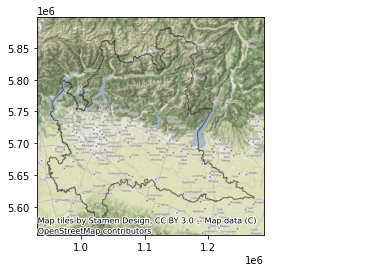

In [ ]:
regione=Regioni[Regioni["DEN_REG"]==cerca]
if regione.empty:
  print("regione insesistente")
else:
  regioneGeo=Regioni[Regioni["DEN_REG"]==cerca].geometry.squeeze()
  ax=regione.to_crs(epsg=3857).plot(alpha=0.5,edgecolor="k",facecolor="none")
  contextily.add_basemap(ax=ax)

In [ ]:
province.head(1)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.81127,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."


In [ ]:
Ncomuni=comuni.groupby("COD_PROV").count()[["COMUNE"]].reset_index()
Ncomuni

In [ ]:
provLomb=province[province["COD_REG"]==3]
provLomb

In [ ]:
ProvNComuni=pd.merge(provLomb,Ncomuni,on="COD_PROV",how="left")
ProvNComuni

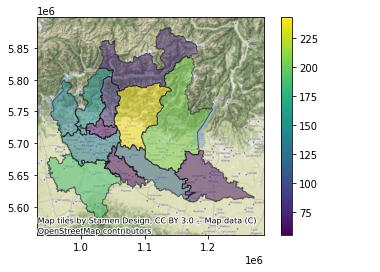

In [ ]:
ax=ProvNComuni.to_crs(epsg=3857).plot(alpha=0.5,edgecolor="k",facecolor="g",column="COMUNE",legend=True)
contextily.add_basemap(ax)

In [ ]:
print("Dato il nome di una autostrada che attraversa la Lombardia (inserito dall’utente), visualizzare su una mappa il tracciato dell’autostrada e i parchi regionali che attraversa. I parchi devono essere colorati di verde ma in trasparenza deve essere possibile vedere la mappa della Lombardia. Controllare che il nome dell’autostrada sia presente nel dataset: in caso negativo dare un messaggio di errore.")
cerca=input("inserire autostrada: ")
lombardia=Regioni[Regioni["DEN_REG"]=="Lombardia"]
lombardiaGeo=Regioni[Regioni["DEN_REG"]=="Lombardia"].geometry.squeeze()

Dato il nome di una autostrada che attraversa la Lombardia (inserito dall’utente), visualizzare su una mappa il tracciato dell’autostrada e i parchi regionali che attraversa. I parchi devono essere colorati di verde ma in trasparenza deve essere possibile vedere la mappa della Lombardia. Controllare che il nome dell’autostrada sia presente nel dataset: in caso negativo dare un messaggio di errore.
inserire autostrada: A4


In [ ]:
autostrada

In [ ]:
autostrada=autostrade[autostrade["COD_PE"]==cerca]
if autostrada.empty:
  print("autostrada insesistente")
else:
    parchiAU= parchi[parchi.intersects(autostrada.unary_union)]
    autostradaGeo=autostrade[autostrade["COD_PE"]==cerca].geometry.squeeze()
    ax=autostrada.to_crs(epsg=3857).plot(figsize=(20,20),alpha=0.5,edgecolor="r",facecolor="none")
    parchiAU.to_crs(epsg=3857).plot(ax=ax, facecolor="g", alpha=0.5, edgecolor="b")
    contextily.add_basemap(ax)

2.Dato il nome di una autostrada che attraversa la Lombardia (inserito dall’utente), visualizzare su una mappa
il tracciato dell’autostrada e i parchi regionali che attraversa. I parchi devono essere colorati di verde ma in
trasparenza deve essere possibile vedere la mappa della Lombardia. Controllare che il nome dell’autostrada
sia presente nel dataset: in caso negativo dare un messaggio di errore.

3.Visualizzare tutti i comuni che si trovano a meno di una certa distanza (inserita dall’utente) da un comune
(inserito anch’esso dall’utente).